<a href="https://colab.research.google.com/github/aayushrai/Deep-Learning/blob/master/RNN/LSTM(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
# Generate data
data = [[[i+j] for i in range(0,5)]for j in range(0,100)]
target = [i+5 for i in range(0,100)]

In [0]:
# convert list into numpy array
data = np.array(data,np.float32)/255
target = np.array(target,np.float32)/255

In [4]:
data.shape

(100, 5, 1)

In [0]:
# split data for training and validation
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size =.2,random_state =4)

In [6]:
#model
model = Sequential()
model.add(LSTM(1,input_shape=(5,1),return_sequences=True))
model.add(LSTM(1,return_sequences=False))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 1)              12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="mean_absolute_error",optimizer="adam",metrics=["accuracy"])

In [13]:
history = model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/200
80/80 [==============================] - 0s 1ms/sample - loss: 0.1402 - acc: 0.0000e+00 - val_loss: 0.0988 - val_acc: 0.0000e+00
Epoch 2/200
80/80 [==============================] - 0s 865us/sample - loss: 0.1384 - acc: 0.0000e+00 - val_loss: 0.0981 - val_acc: 0.0000e+00
Epoch 3/200
80/80 [==============================] - 0s 952us/sample - loss: 0.1367 - acc: 0.0000e+00 - val_loss: 0.0974 - val_acc: 0.0000e+00
Epoch 4/200
80/80 [==============================] - 0s 933us/sample - loss: 0.1352 - acc: 0.0000e+00 - val_loss: 0.0967 - val_acc: 0.0000e+00
Epoch 5/200
80/80 [==============================] - 0s 958us/sample - loss: 0.1334 - acc: 0.0000e+00 - val_loss: 0.0960 - val_acc: 0.0000e+00
Epoch 6/200
80/80 [==============================] - 0s 1ms/sample - loss: 0.1320 - acc: 0.0000e+00 - val_loss: 0.0956 - val_acc: 0.0000e+00
Epoch 7/200
80/80 [==============================] - 0s 1ms/sample - loss: 0.1303 - acc: 0.0000e+00 - 

In [0]:
result = model.predict(x_test)

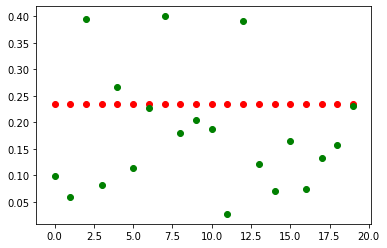

In [15]:
plt.scatter(range(20),result,c="r")
plt.scatter(range(20),y_test,c="g")

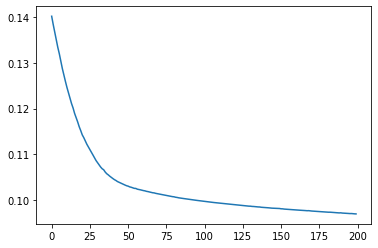

In [16]:
plt.plot(history.history["loss"])
plt.show()